In [1]:
import numpy as np
import matplotlib.pyplot as plt
from trainSpringerSegmentationAlgorithm import trainSpringerSegmentationAlgorithm
from runSpringerSegmentationAlgorithm import runSpringerSegmentationAlgorithm

In [2]:
include_wavelet = 0
featuresFs = 50
fs = 1000  # original sampling frequency
audio_list = [np.loadtxt('train/train_recording_1.txt'),
              np.loadtxt('train/train_recording_2.txt'),
              np.loadtxt('train/train_recording_3.txt'),
              np.loadtxt('train/train_recording_4.txt'),
              np.loadtxt('train/train_recording_5.txt')
              ]
annotations_list = [np.loadtxt('train/train_annotations_1.txt'),
                    np.loadtxt('train/train_annotations_2.txt'),
                    np.loadtxt('train/train_annotations_3.txt'),
                    np.loadtxt('train/train_annotations_4.txt'),
                    np.loadtxt('train/train_annotations_5.txt')
                    ]

logistic_regression_B_matrix, pi_vector, total_obs_distribution = trainSpringerSegmentationAlgorithm(audio_list, annotations_list, fs)

In [3]:
total_obs_distribution_matlab = []
total_obs_distribution_matlab.append(np.array([-7.20188112263631e-17,	-5.59431837204785e-17,	-1.37285858900255e-16]))
total_obs_distribution_matlab.append(np.array([[0.999275887038377,	0.901195017679220,	0.757009773375425],
[0.901195017679220,	0.999275887038378,	0.881206546250959],
[0.757009773375425,	0.881206546250959,	0.999275887038377]]))

logistic_regression_B_matrix_matlab = [
    np.array([0.768601230285194, -2.36916125246872, 1.33401331967011, -0.0154181502251833]),
    np.array([0.0348144193553617, 1.61052273372253, -0.658761710830248, 0.517613213850238]),
    np.array([0.249350696813833, -0.332256305892264, -0.184534572878641, 0.0502171051665354]),
    np.array([0.445874669997996, 3.92243992649834, -1.64384809828363, 0.371850731404145])
]

Heart Rate: 69.84866123399301 BPM
Systolic Time: 0.34 s


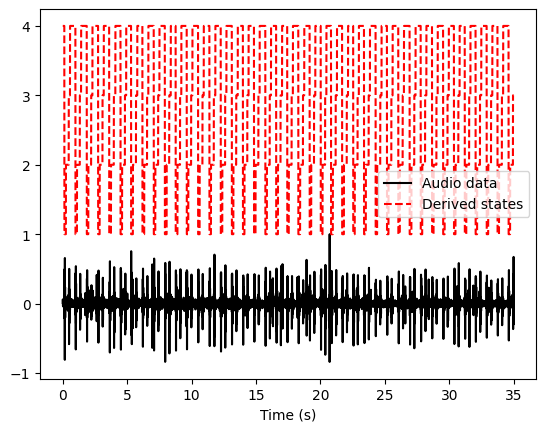

In [7]:
audio_test = np.loadtxt('test/test_recording.txt')

assigned_states = runSpringerSegmentationAlgorithm(
    audio_test,
    fs,
    logistic_regression_B_matrix,
    pi_vector, total_obs_distribution,
    figures=True
    )
# normalize assigned_states from 0 to 1
assigned_states = (assigned_states - np.min(assigned_states)) / (np.max(assigned_states) - np.min(assigned_states))
audio_test = audio_test/np.max(np.abs(audio_test))

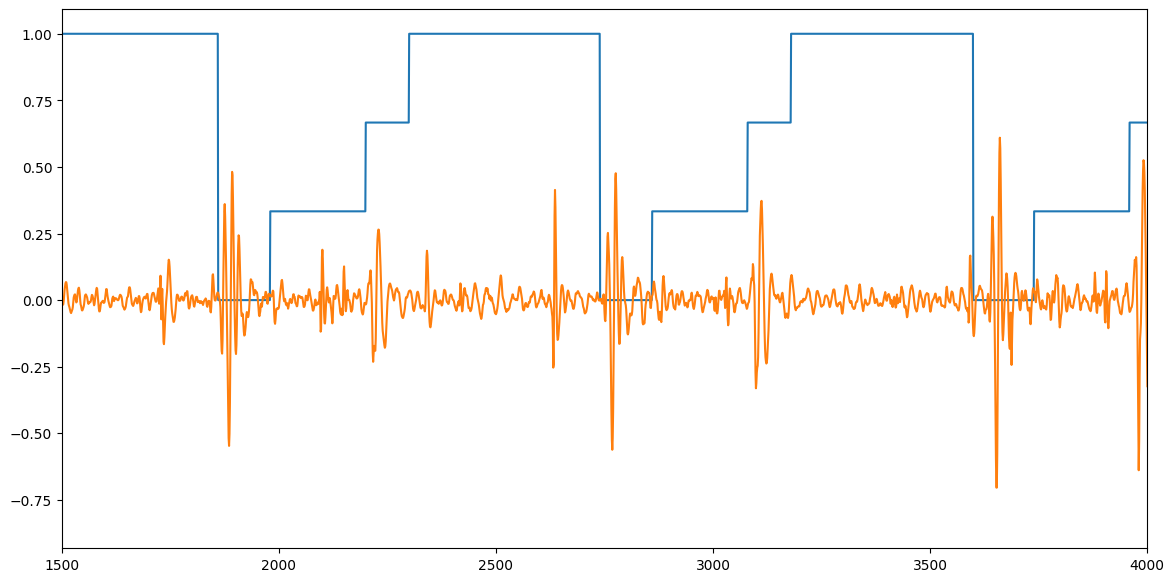

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(assigned_states)
plt.plot(audio_test)
plt.xlim(1500, 4000)
plt.show()